# Example - ENEM

<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-the-target" data-toc-modified-id="Creating-the-target-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating the target</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Checking-the-support-in-the-different-environments" data-toc-modified-id="Checking-the-support-in-the-different-environments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking the support in the different environments</a></span><ul class="toc-item"><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Benchmark</a></span></li></ul></li><li><span><a href="#Challenger-model" data-toc-modified-id="Challenger-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenger model</a></span></li><li><span><a href="#Feature-Importance-migration" data-toc-modified-id="Feature-Importance-migration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Importance migration</a></span></li><li><span><a href="#Reverse-Learning-Curve" data-toc-modified-id="Reverse-Learning-Curve-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reverse Learning Curve</a></span></li><li><span><a href="#Performance-comparison" data-toc-modified-id="Performance-comparison-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Performance comparison</a></span></li><li><span><a href="#TRF-as-feature-selection" data-toc-modified-id="TRF-as-feature-selection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>TRF as feature selection</a></span></li><li><span><a href="#Feature-Impact" data-toc-modified-id="Feature-Impact-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Feature Impact</a></span></li><li><span><a href="#Minimum-samples-by-period-effect" data-toc-modified-id="Minimum-samples-by-period-effect-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Minimum samples by period effect</a></span></li><li><span><a href="#Domain-classifier" data-toc-modified-id="Domain-classifier-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Domain classifier</a></span></li><li><span><a href="#Other-optimization-design-for-the-RF" data-toc-modified-id="Other-optimization-design-for-the-RF-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Other optimization design for the RF</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from time_robust_forest.models import TimeForestClassifier
from time_robust_forest.functions import check_categoricals_match, check_numerical_match
from models.aux_functions import *

np.random.seed(42)

In [2]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
set_style()

In [4]:
DATASETS_PATH = "~/Documents/datasets/enem/"
PREFIX = "enem"

In [5]:
data = pd.read_csv(DATASETS_PATH + "enem_all_years.csv")

In [6]:
data = data.sample(frac=0.5)

In [7]:
data.shape

(168570, 135)

In [8]:
data.nunique()

Unnamed: 0                 167117
IN_TREINEIRO                    2
NO_MUNICIPIO_NASCIMENTO      4502
TX_RESPOSTAS_CH            122634
Q006                           17
                            ...  
IN_ACESSO                       2
IN_LEDOR                        2
NU_NOTA_COMP1                  17
Q005                           20
IN_DISCALCULIA                  2
Length: 135, dtype: int64

In [9]:
data.head()

,Unnamed: 0,IN_TREINEIRO,NO_MUNICIPIO_NASCIMENTO,TX_RESPOSTAS_CH,Q006,IN_SONDA,Q012,Q023,CO_ESCOLA,NO_MUNICIPIO_RESIDENCIA,...,IN_SALA_ACOMPANHANTE,IN_MAQUINA_BRAILE,IN_MOBILIARIO_ESPECIFICO,Q002,TX_RESPOSTAS_LC,IN_ACESSO,IN_LEDOR,NU_NOTA_COMP1,Q005,IN_DISCALCULIA
32685,7698531,0,Dois Irmãos,NaN,B,0,B,A,NaN,Dois Irmãos,...,0,0,0,C,NaN,0,0,0.0,4.0,0
217248,4681225,0,Carapicuíba,NaN,C,0,B,A,NaN,Iguatu,...,0,0,0,D,NaN,0,0,NaN,2.0,0
3945,6993724,0,Taquari,NaN,B,0,B,A,NaN,Taquari,...,0,0,0,C,NaN,0,0,0.0,2.0,0
298014,2659142,0,Barcarena,BBACABBAAEEEDCDBCEABEDBDAADAADEABEECAC.BDACBC,A,0,B,A,NaN,Barcarena,...,0,0,0,E,BAEED99999ABCDAEDEECCBBCBCBBDBEADBAAADEDEEDBCA...,0,0,100.0,3.0,0
102332,1117272,0,Uberlândia,DDBCADBDADDDABEAACCACAAABEDBABCBEEABAAAADCACE,E,0,B,B,NaN,Uberlândia,...,0,0,0,D,99999DDBDADADADCECDDBBCCBACBBAACCCBDCAEEDACBAE...,0,0,120.0,4.0,0


## Creating the target

In [10]:
data["NOTA_TOTAL"] = data[["NU_NOTA_COMP{}".format(i) for i in range(1, 6)]].sum(axis=1)

<AxesSubplot:>

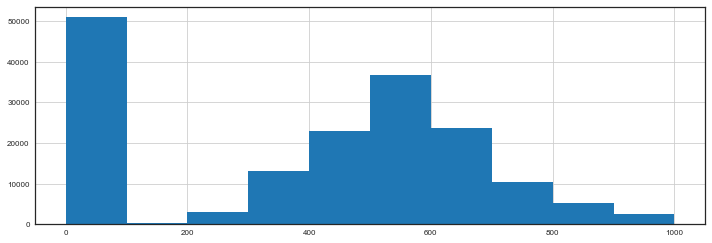

In [11]:
data["NOTA_TOTAL"].hist()

In [12]:
median_grade = data.groupby("NU_ANO")["NOTA_TOTAL"].median()

In [13]:
median_grade.rename("MEDIAN_NOTA", inplace=True)

NU_ANO
2015    480.0
2016    460.0
2017    460.0
2018    400.0
2019    520.0
Name: MEDIAN_NOTA, dtype: float64

In [14]:
data = data.merge(median_grade, left_on="NU_ANO", right_index=True)

In [15]:
data["target"] = (data["NOTA_TOTAL"] >= data["MEDIAN_NOTA"]).astype(int)

In [16]:
data["target"].mean()

0.5179332028237528

## Modeling

### Data

In [17]:
[col for col in data.columns if "CO_" in col]

['CO_ESCOLA',
 'CO_UF_RESIDENCIA',
 'CO_PROVA_LC',
 'CO_PROVA_CH',
 'CO_PROVA_CN',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_PROVA',
 'CO_UF_NASCIMENTO',
 'CO_MUNICIPIO_PROVA',
 'CO_MUNICIPIO_ESC',
 'CO_PROVA_MT',
 'CO_UF_ESC',
 'CO_MUNICIPIO_RESIDENCIA']

In [18]:
[col for col in data.columns if "TP_" in col]

['TP_STATUS_REDACAO',
 'TP_ST_CONCLUSAO',
 'TP_SIT_FUNC_ESC',
 'TP_PRESENCA_MT',
 'TP_ESCOLA',
 'TP_COR_RACA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_LC',
 'TP_LOCALIZACAO_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_SEXO',
 'TP_ENSINO',
 'TP_PRESENCA_CH',
 'TP_ANO_CONCLUIU',
 'TP_LINGUA',
 'TP_NACIONALIDADE',
 'TP_ESTADO_CIVIL']

In [19]:
TIME_COLUMN = "Year"
TARGET = "target"

In [20]:
columns_to_label_encode = ["TP_SEXO"] + ["Q{}".format(str(i).zfill(3)) for i in range(1, 26)]

In [22]:
encoder_mappings = {}
le = LabelEncoder()
for column in columns_to_label_encode:
    print(column)
    data[column].fillna("None", inplace=True)
    data[column] = data[column].astype(str)
    data[column] = le.fit_transform(data[[column]])
    encoder_mappings[column] = {i: le.__dict__["classes_"][i] for i in range(len(le.__dict__["classes_"]))}

TP_SEXO


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Q001
Q002
Q003
Q004
Q005
Q006
Q007
Q008
Q009
Q010
Q011
Q012
Q013
Q014
Q015
Q016
Q017
Q018
Q019
Q020
Q021
Q022
Q023
Q024
Q025


In [23]:
numerical_features = ["CO_UF_PROVA",
                      "CO_UF_NASCIMENTO",
                      "CO_UF_RESIDENCIA",
                      "NU_IDADE",
                      "IN_SEM_RECURSO",
                      "TP_ESTADO_CIVIL"] 

In [24]:
data[numerical_features].dtypes

CO_UF_PROVA           int64
CO_UF_NASCIMENTO    float64
CO_UF_RESIDENCIA      int64
NU_IDADE            float64
IN_SEM_RECURSO        int64
TP_ESTADO_CIVIL     float64
dtype: object

In [25]:
data[numerical_features].head()

,CO_UF_PROVA,CO_UF_NASCIMENTO,CO_UF_RESIDENCIA,NU_IDADE,IN_SEM_RECURSO,TP_ESTADO_CIVIL
32685,43,43.0,43,20.0,0,0.0
3945,43,43.0,43,36.0,0,2.0
45966,51,51.0,51,39.0,0,1.0
69192,11,31.0,11,24.0,0,NaN
73177,15,15.0,15,17.0,0,0.0


In [26]:
features = numerical_features + columns_to_label_encode

In [27]:
data["NU_ANO"].min()

2015

In [28]:
data["NU_ANO"].max()

2019

In [29]:
data["Year"] = data["NU_ANO"]

In [30]:
data["Year"]

32685     2015
3945      2015
45966     2015
69192     2015
73177     2015
          ... 
255851    2018
231078    2018
271555    2018
284494    2018
278792    2018
Name: Year, Length: 168570, dtype: int64

In [31]:
data["Year"].min()

2015

In [32]:
data["Year"].max()

2019

In [33]:
training_start_year = 2015
training_end_year = 2017
holdout_end_year = 2019

In [34]:
in_time = data[data["Year"] <= training_end_year]
in_time = in_time[in_time["Year"] >= training_start_year]
out_of_time = data[data["Year"] > training_end_year]

In [35]:
train, test = train_test_split(in_time, 
                               test_size=0.2,
                               random_state=42)

In [36]:
median_input = train.median()
train.fillna(median_input, inplace=True)
test.fillna(median_input, inplace=True)
out_of_time.fillna(median_input, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
train[numerical_features] = train[numerical_features].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Checking the support in the different environments

In [38]:
check_categoricals_match(train, columns_to_label_encode, "Year")

Year
2015    1.0
2016    1.0
2017    1.0
Name: TP_SEXO, dtype: float64
Year
2015    1.000000
2016    0.888889
2017    0.888889
Name: Q001, dtype: float64
Year
2015    1.000000
2016    0.888889
2017    0.888889
Name: Q002, dtype: float64
Year
2015    1.000000
2016    0.857143
2017    0.857143
Name: Q003, dtype: float64
Year
2015    1.000000
2016    0.857143
2017    0.857143
Name: Q004, dtype: float64
Year
2015    0.952381
2016    0.952381
2017    0.952381
Name: Q005, dtype: float64
Year
2015    1.000000
2016    0.944444
2017    0.944444
Name: Q006, dtype: float64
Year
2015    1.0
2016    0.8
2017    0.8
Name: Q007, dtype: float64
Year
2015    1.000000
2016    0.833333
2017    0.833333
Name: Q008, dtype: float64
Year
2015    1.000000
2016    0.833333
2017    0.833333
Name: Q009, dtype: float64
Year
2015    1.000000
2016    0.833333
2017    0.833333
Name: Q010, dtype: float64
Year
2015    1.000000
2016    0.833333
2017    0.833333
Name: Q011, dtype: float64
Year
2015    1.000000
2016    0

0.8803011803011803

In [39]:
check_numerical_match(train, numerical_features, TIME_COLUMN, verbose=True, n_q=10)

Year
2015    1.0
2016    1.0
2017    1.0
Name: CO_UF_PROVA_quant, dtype: float64
Year
2015    1.0
2016    1.0
2017    1.0
Name: CO_UF_NASCIMENTO_quant, dtype: float64
Year
2015    1.0
2016    1.0
2017    1.0
Name: CO_UF_RESIDENCIA_quant, dtype: float64
Year
2015    0.888889
2016    1.000000
2017    0.777778
Name: NU_IDADE_quant, dtype: float64
Year
2015    1.0
2016    1.0
2017    1.0
Name: IN_SEM_RECURSO_quant, dtype: float64
Year
2015    1.0
2016    1.0
2017    1.0
Name: TP_ESTADO_CIVIL_quant, dtype: float64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.9814814814814815

### Benchmark

In [40]:
from pycaret.classification import *

In [41]:
TARGET

'target'

In [42]:
clf1 = setup(train[features + [TARGET]], 
             target=TARGET,
             session_id=200, 
             log_experiment=False, 
             experiment_name="{}".format(PREFIX),
             silent=True)

rf = create_model('rf')
tuned_rf = tune_model(rf,
                     optimize="AUC",
                     fold=5,
                     n_iter=150)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6292,0.6809,0.5494,0.6675,0.6027,0.2611,0.2655
1,0.6315,0.6844,0.5597,0.6670,0.6087,0.2654,0.2691
2,0.6311,0.6814,0.5668,0.6637,0.6114,0.2644,0.2674
3,0.6352,0.6792,0.5705,0.6685,0.6156,0.2727,0.2758
4,0.6239,0.6753,0.5584,0.6560,0.6033,0.2502,0.2531
Mean,0.6302,0.6802,0.5610,0.6645,0.6083,0.2628,0.2662
SD,0.0037,0.0030,0.0073,0.0046,0.0049,0.0073,0.0074


In [43]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=-1, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [44]:
benchmark_model = tuned_rf
benchmark_model.fit(train[features], train[TARGET])

train["benchmark_prediction_opt"] = benchmark_model.predict_proba(train[features])[:, 1]
test["benchmark_prediction_opt"] = benchmark_model.predict_proba(test[features])[:, 1]
out_of_time["benchmark_prediction_opt"] = benchmark_model.predict_proba(out_of_time[features])[:, 1]

In [45]:
print(roc_auc_score(train[TARGET], train["benchmark_prediction_opt"]))
print(roc_auc_score(test[TARGET], test["benchmark_prediction_opt"]))
print(roc_auc_score(out_of_time[TARGET], out_of_time["benchmark_prediction_opt"]))

0.6912943123734847
0.6915045296065403
0.6824757712301587


In [46]:
benchmark_model = RandomForestClassifier(n_estimators=250, max_depth=8)
benchmark_model.fit(train[features], train[TARGET])

train["benchmark_prediction"] = benchmark_model.predict_proba(train[features])[:, 1]
test["benchmark_prediction"] = benchmark_model.predict_proba(test[features])[:, 1]
out_of_time["benchmark_prediction"] = benchmark_model.predict_proba(out_of_time[features])[:, 1]

In [47]:
print(roc_auc_score(train[TARGET], train["benchmark_prediction"]))
print(roc_auc_score(test[TARGET], test["benchmark_prediction"]))
print(roc_auc_score(out_of_time[TARGET], out_of_time["benchmark_prediction"]))

0.7069387721038481
0.6946692493400899
0.6864472117334859


In [48]:
# benchmark_importances = benchmark_model.feature_importances_
# benchmark_importances = pd.Series(benchmark_importances, index=features)
# benchmark_importances.rename("RF", inplace=True)

In [49]:
results = reverse_learning_curve(train, out_of_time, tuned_rf, features, TARGET, TIME_COLUMN, roc_auc_score, n_rounds=5)

In [50]:
benchmark_importances = results["feature_importance"][-1].copy(deep=True)
benchmark_importances.rename("RF", inplace=True)

CO_UF_PROVA         0.000267
CO_UF_NASCIMENTO    0.000049
CO_UF_RESIDENCIA    0.001015
NU_IDADE            0.032596
IN_SEM_RECURSO      0.000000
TP_ESTADO_CIVIL    -0.003406
TP_SEXO             0.000882
Q001               -0.000107
Q002               -0.000533
Q003                0.001695
Q004                0.000141
Q005                0.000005
Q006                0.003854
Q007                0.000044
Q008               -0.000294
Q009                0.000579
Q010                0.000049
Q011               -0.000080
Q012                0.000000
Q013               -0.000125
Q014                0.000000
Q015                0.000000
Q016               -0.000129
Q017                0.000000
Q018                0.000022
Q019                0.000418
Q020                0.000521
Q021               -0.000062
Q022               -0.002715
Q023                0.001010
Q024                0.000403
Q025                0.002423
Name: RF, dtype: float64

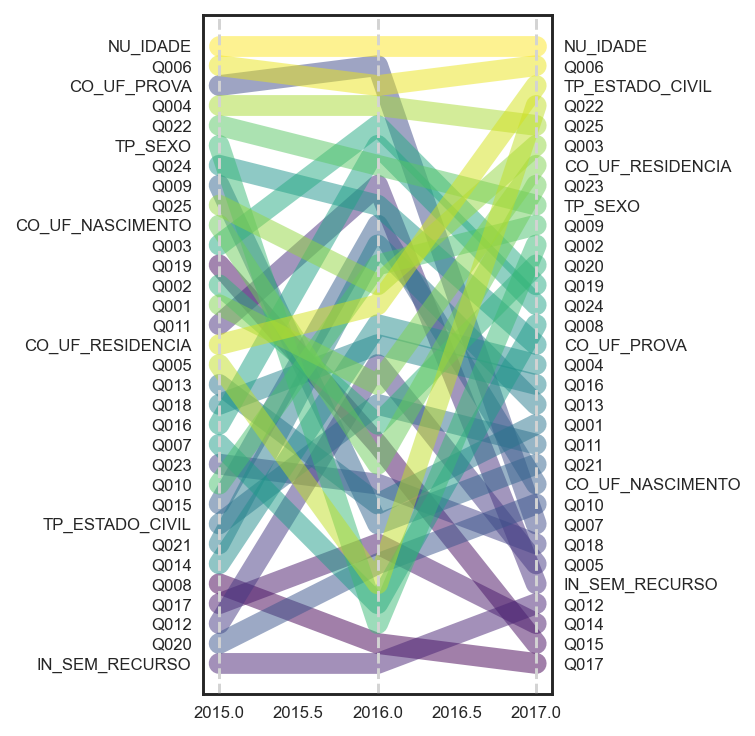

In [51]:
importance_by_reverse_segment_benchmark = plot_feature_migration_from_learning_curve_results(results, features, 
                                                                                             save_as="../images/{}_benchmark_importance_migration_learning_curve.eps".format(PREFIX))

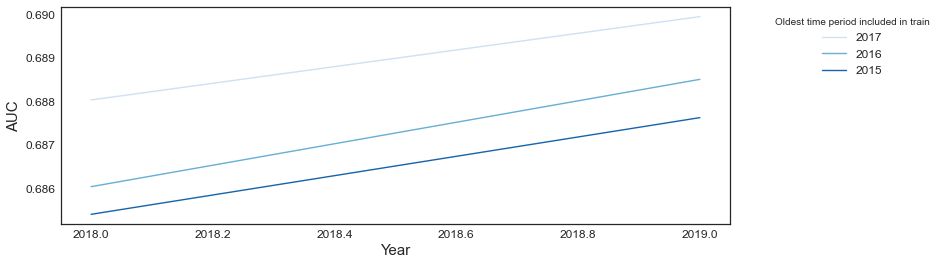

In [52]:
fig, ax = plt.subplots()

blues = plt.get_cmap("Blues")
gradient = np.linspace(.2, 0.8, len(results["holdout_performance"]))

for i, r in enumerate(results["holdout_performance_by_period"]):
    r.plot(label=results["last_period_included"][i], color=blues(gradient[i]))

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=12, title="Oldest time period included in train")
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)

plt.savefig("../images/{}_perf_by_period_reverse_learning_curve_benchmark.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()

In [53]:
results

{'round': [],
 'holdout_performance': [0.6840963018862694,
  0.6826620023979764,
  0.6824757712301587],
 'feature_importance': [CO_UF_PROVA         0.001847
  CO_UF_NASCIMENTO    0.001121
  CO_UF_RESIDENCIA    0.000730
  NU_IDADE            0.040164
  IN_SEM_RECURSO     -0.000040
  TP_ESTADO_CIVIL    -0.000193
  TP_SEXO             0.001602
  Q001               -0.000769
  Q002               -0.000806
  Q003                0.000948
  Q004                0.001709
  Q005               -0.000672
  Q006                0.003520
  Q007                0.000338
  Q008               -0.000102
  Q009               -0.001325
  Q010               -0.000251
  Q011               -0.000748
  Q012                0.000058
  Q013               -0.000636
  Q014               -0.000116
  Q015               -0.000209
  Q016               -0.000387
  Q017                0.000067
  Q018               -0.000481
  Q019               -0.000895
  Q020               -0.000044
  Q021               -0.000151
  Q022

## Challenger model

In [54]:
train.reset_index(drop=True, inplace=True)

In [55]:
train[features + [TIME_COLUMN]]

,CO_UF_PROVA,CO_UF_NASCIMENTO,CO_UF_RESIDENCIA,NU_IDADE,IN_SEM_RECURSO,TP_ESTADO_CIVIL,TP_SEXO,Q001,Q002,Q003,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Year
0,15,15,15,26,0,0,0,1,1,0,...,0,0,1,1,0,2,0,0,0,2015
1,31,31,31,21,0,0,1,6,6,3,...,0,0,1,0,0,3,1,1,1,2016
2,32,32,32,21,0,0,1,4,3,1,...,0,0,1,1,0,3,0,0,1,2016
3,13,13,13,18,0,0,0,2,2,1,...,0,0,1,0,0,2,0,1,0,2017
4,35,35,35,28,0,1,0,2,2,2,...,0,1,1,1,0,2,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92407,15,15,15,21,0,0,1,7,7,1,...,0,0,2,0,0,2,0,0,0,2016
92408,41,41,41,16,0,0,1,2,5,2,...,0,0,2,0,1,4,0,0,1,2016
92409,35,35,35,24,0,0,1,5,5,4,...,0,0,1,0,1,1,1,1,1,2016
92410,31,31,31,32,0,0,1,1,1,0,...,0,0,1,0,0,2,0,0,0,2015


In [56]:
train["Year"].value_counts()

2016    34571
2015    30845
2017    26996
Name: Year, dtype: int64

In [57]:
CHALLENGER_MAX_DEPTH = int(tuned_rf.max_depth)
CHALLENGER_N_ESTIMATORS = int(tuned_rf.n_estimators)
CHALLENGER_MIN_SAMPLES_BY_PERIODS = 10

In [58]:
challenger_model_max = TimeForestClassifier(time_column=TIME_COLUMN,
                                        n_estimators=CHALLENGER_N_ESTIMATORS,
                                        min_sample_periods=CHALLENGER_MIN_SAMPLES_BY_PERIODS,
                                        max_depth=CHALLENGER_MAX_DEPTH,
                                        period_criterion='max',
                                        multi=True)

challenger_model_max.fit(train[features + [TIME_COLUMN]], train[TARGET].values)

In [59]:
train["challenger_prediction_max"] = challenger_model_max.predict_proba(train[features])[:, 1]
test["challenger_prediction_max"] = challenger_model_max.predict_proba(test[features])[:, 1]
out_of_time["challenger_prediction_max"] = challenger_model_max.predict_proba(out_of_time[features])[:, 1]

In [60]:
print(roc_auc_score(train[TARGET], train["challenger_prediction_max"]))
print(roc_auc_score(test[TARGET], test["challenger_prediction_max"]))
print(roc_auc_score(out_of_time[TARGET], out_of_time["challenger_prediction_max"]))

0.7118482250161537
0.6965696131508561
0.6877436619092652


In [61]:
challenger_model_max.feature_importance()

challenger_model_max_importances = challenger_model_max.feature_importance()
challenger_model_max_importances.rename("TRF Max", inplace=True)

NU_IDADE            12912
CO_UF_PROVA         10600
CO_UF_NASCIMENTO    10224
CO_UF_RESIDENCIA     9587
Q006                 9004
Q001                 7769
Q005                 7614
Q002                 7597
Q003                 6852
Q004                 5885
Q022                 5576
TP_SEXO              4441
Q009                 4422
Q024                 3607
Q020                 3533
Q019                 3465
Q010                 2909
Q013                 2827
Q011                 2695
Q008                 2669
Q016                 2643
Q023                 2562
Q014                 2533
Q021                 2144
TP_ESTADO_CIVIL      1884
Q025                 1860
Q018                 1548
Q015                 1208
Q007                  921
Q012                  605
Q017                  201
IN_SEM_RECURSO         19
Name: TRF Max, dtype: int64

In [62]:
challenger_model = TimeForestClassifier(time_column=TIME_COLUMN,
                                        n_estimators=CHALLENGER_N_ESTIMATORS,
                                        min_sample_periods=CHALLENGER_MIN_SAMPLES_BY_PERIODS,
                                        max_depth=CHALLENGER_MAX_DEPTH,
                                        criterion="std_norm",
                                        multi=True)
challenger_model.fit(train[features + [TIME_COLUMN]], train[TARGET].values)

train["challenger_prediction"] = challenger_model.predict_proba(train[features])[:, 1]
test["challenger_prediction"] = challenger_model.predict_proba(test[features])[:, 1]
out_of_time["challenger_prediction"] = challenger_model.predict_proba(out_of_time[features])[:, 1]

In [63]:
print(roc_auc_score(train[TARGET], train["challenger_prediction"]))
print(roc_auc_score(test[TARGET], test["challenger_prediction"]))
print(roc_auc_score(out_of_time[TARGET], out_of_time["challenger_prediction"]))

0.7160959012653743
0.697681364692047
0.6874654993736665


## Feature Importance migration

In [64]:
challenger_model = TimeForestClassifier(time_column=TIME_COLUMN,
                                        n_estimators=CHALLENGER_N_ESTIMATORS,
                                        min_sample_periods=CHALLENGER_MIN_SAMPLES_BY_PERIODS,
                                        max_depth=CHALLENGER_MAX_DEPTH,
                                        multi=True)

results_trt = reverse_learning_curve(train, out_of_time, challenger_model, features, TARGET, TIME_COLUMN, roc_auc_score, n_rounds=5, trt_model=True)

KeyboardInterrupt: 

In [ ]:
challenger_model_importances = results_trt["feature_importance"][-1].copy(deep=True)
challenger_model_importances.rename("TRF", inplace=True)

In [ ]:
all_models_importance = pd.DataFrame(index=features)
all_models_importance = all_models_importance.merge(benchmark_importances, how="left", left_index=True, 
                            right_index=True)
all_models_importance = all_models_importance.merge(challenger_model_importances, how="left", left_index=True, 
                            right_index=True)
all_models_importance = all_models_importance.merge(challenger_model_max_importances, how="left", left_index=True, 
                            right_index=True)

all_models_importance.fillna(0, inplace=True)
all_models_importance

In [ ]:
plot_shap_difference(all_models_importance[["RF", "TRF"]], title="", save_as="../images/{}_importance_migration.eps".format(PREFIX))

In [ ]:
plot_shap_difference(all_models_importance, title="", save_as="../images/{}_importance_migration_trf_max.eps".format(PREFIX))

## Reverse Learning Curve

In [ ]:
importance_by_reverse_segment_challenger = plot_feature_migration_from_learning_curve_results(results_trt, features, 
                                                                                             save_as="../images/{}_challenger_importance_migration_learning_curve.eps".format(PREFIX))
importance_by_reverse_segment_challenger

In [ ]:
fig, ax = plt.subplots()

greens = plt.get_cmap("Greens")
gradient = np.linspace(.2, 0.8, len(results_trt["holdout_performance"]))

for i, r in enumerate(results_trt["holdout_performance_by_period"]):
    r.plot(label=results_trt["last_period_included"][i], color=greens(gradient[i]))

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=12, title="Oldest time period included in train")
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)

plt.savefig("../images/{}_perf_by_period_reverse_learning_curve_challenger.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.plot([str(i) for i in results["sample_size"]], results["holdout_performance"], label="RF")
plt.plot(results_trt["holdout_performance"], label="TRF", linestyle="dashed", color="green")
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC in the holdout", fontsize=15)
plt.xlabel("Sample size", fontsize=15)
plt.savefig("../images/{}_reverse_learning_curve_sample.eps".format(PREFIX), format="eps")
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.plot([str(i) for i in results["last_period_included"]], results["holdout_performance"], label="RF")
plt.plot(results_trt["holdout_performance"], label="TRF", linestyle="dashed", color="green")
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC in the holdout", fontsize=15)
plt.xlabel("Oldest time period included in the training", fontsize=15)
plt.savefig("../images/{}_reverse_learning_curve_segments.eps".format(PREFIX), format="eps")
plt.show()

In [ ]:
fig, ax = plt.subplots()

greens = plt.get_cmap("Greens")
gradient = np.linspace(.2, 0.8, len(results_trt["holdout_performance"]))

for i, r in enumerate(results_trt["holdout_performance_by_period"]):
    r.plot(label=results_trt["last_period_included"][i], color=greens(gradient[i]))
    
for i, r in enumerate(results["holdout_performance_by_period"]):
    r.plot(label=results["last_period_included"][i], color=blues(gradient[i]))

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=12, title="Oldest time period included in train")
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)

plt.savefig("../images/{}_perf_by_period_reverse_learning_curve_both.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()

## Performance comparison

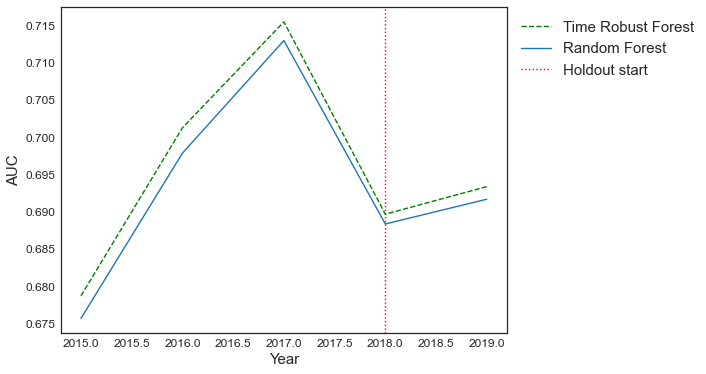

In [67]:
fig, ax = plt.subplots()
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["challenger_prediction"])).plot(label="Time Robust Forest", 
                                                                                                      linestyle="dashed",
                                                                                                      color="green", ax=ax)
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction"])).plot(label="Random Forest", ax=ax)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(training_end_year + 1, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
plt.ylim([ymin, ymax])
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.savefig("../images/{}_test_holdout_auc_years_non_opt.eps".format(PREFIX), format="eps")
plt.show()

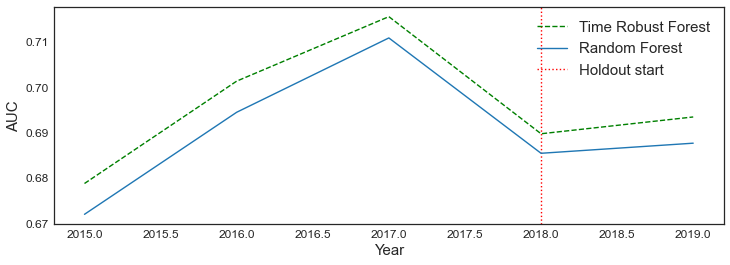

In [65]:
fig, ax = plt.subplots()
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["challenger_prediction"])).plot(label="Time Robust Forest", 
                                                                                                      linestyle="dashed",
                                                                                                      color="green", ax=ax)
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt"])).plot(label="Random Forest", ax=ax)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(training_end_year + 1, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
plt.ylim([ymin, ymax])
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.savefig("../images/{}_test_holdout_auc_years.eps".format(PREFIX), format="eps")
plt.show()

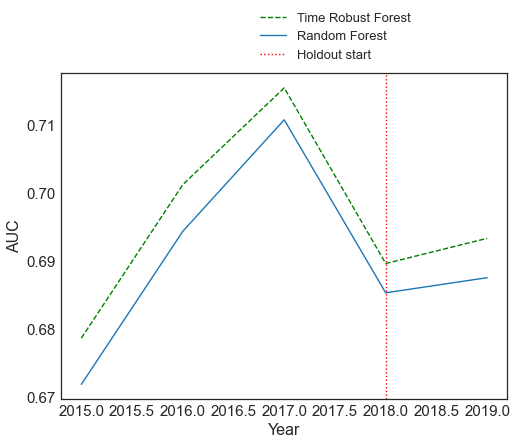

In [66]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax = plt.subplots()
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["challenger_prediction"])).plot(label="Time Robust Forest", 
                                                                                                      linestyle="dashed",
                                                                                                      color="green", ax=ax)
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt"])).plot(label="Random Forest", ax=ax)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(training_end_year + 1, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
plt.ylim([ymin, ymax])
plt.legend(fontsize=13, bbox_to_anchor=(0.42, 1.0))

plt.ylabel("AUC", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.savefig("../images/{}_test_holdout_auc_years_square.eps".format(PREFIX), format="eps")
plt.show()

## TRF as feature selection

In [ ]:
challenger_model.feature_importance()

In [ ]:
selected_features = [feature for feature in features if feature in challenger_model.feature_importance().index]
selected_features

In [ ]:
if len(selected_features) == len(features):
    selected_features = list(challenger_model.feature_importance().sort_values(ascending=False).index[:int(len(features)/2)+2].values)
    
selected_features    

In [ ]:
selected_features

In [ ]:
clf1 = setup(train[selected_features + [TARGET]], 
             target=TARGET,
             session_id=3, 
             log_experiment=False, 
             experiment_name="{}_fs".format(PREFIX),
             silent=True)

rf = create_model('rf')
tuned_rf = tune_model(rf,
                     optimize="AUC",
                     fold=5,
                     n_iter=50)

In [ ]:
tuned_rf

In [ ]:
benchmark_model = tuned_rf
benchmark_model.fit(train[selected_features], train[TARGET])

train["benchmark_prediction_opt_selected_features"] = benchmark_model.predict_proba(train[selected_features])[:, 1]
test["benchmark_prediction_opt_selected_features"] = benchmark_model.predict_proba(test[selected_features])[:, 1]
out_of_time["benchmark_prediction_opt_selected_features"] = benchmark_model.predict_proba(out_of_time[selected_features])[:, 1]

In [ ]:
print(roc_auc_score(train[TARGET], train["benchmark_prediction_opt_selected_features"]))
print(roc_auc_score(test[TARGET], test["benchmark_prediction_opt_selected_features"]))
print(roc_auc_score(out_of_time[TARGET], out_of_time["benchmark_prediction_opt_selected_features"]))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["challenger_prediction"])).plot(label="Time Robust Forest", 
                                                                                                      linestyle="dashed",
                                                                                                      color="green", ax=ax)
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt"])).plot(label="Random Forest", ax=ax)

pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt_selected_features"])).plot(label="RF with TRF feature selection", ax=ax)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(training_end_year + 1, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
plt.ylim([ymin, ymax])
plt.legend(fontsize=12, bbox_to_anchor=(0.12, 0.25))
plt.ylabel("AUC", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.savefig("../images/{}_test_holdout_auc_years_square_fs.eps".format(PREFIX), format="eps")
plt.show()

## Feature Impact

In [ ]:
from pygam import LinearGAM
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import PolyCollection as p

In [ ]:
fig, ax = plt.subplots()

sns.distplot(out_of_time["challenger_prediction"], label="TRF")
sns.distplot(out_of_time["benchmark_prediction_opt"], label="RF")

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Density", fontsize=15)
plt.xlabel("Score", fontsize=15)

__file__ = "../images/{}_trf_rf_score_distribution".format(PREFIX)
plt.savefig(__file__+".jpg", quality=95)
for c in ax.findobj(p):
    c.set_zorder(-1)
    c.set_rasterized(True)
ax.set_rasterization_zorder(0)

ax.set_rasterized(True)
plt.savefig(__file__+".eps")        

plt.savefig("../images/{}_trf_rf_score_distribution.eps".format(PREFIX), format="eps")
plt.show()

In [ ]:
ss = StandardScaler()
out_of_time["challenger_prediction_norm"] = ss.fit_transform(out_of_time[["challenger_prediction"]])
out_of_time["benchmark_prediction_norm"] = ss.fit_transform(out_of_time[["benchmark_prediction_opt"]])

In [ ]:
sns.distplot(out_of_time["challenger_prediction_norm"])
sns.distplot(out_of_time["benchmark_prediction_norm"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(out_of_time[features], 
                                                    out_of_time[["challenger_prediction", 
                                                                 "benchmark_prediction"]],
                                                    test_size=0.6,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)

In [ ]:
numerical_features = [feature for feature in features if feature not in columns_to_label_encode]
numerical_features

In [ ]:
p99 = X_train[numerical_features].quantile(.99)
p01 = X_train[numerical_features].quantile(.01)
p005 = X_train.quantile(.005)

X_train[numerical_features] = X_train[numerical_features].where(
    X_train[numerical_features] < p99, other=p99, axis=1)
X_test[numerical_features] = X_test[numerical_features].where(
    X_test[numerical_features] < p99, other=p99, axis=1)

X_train[numerical_features] = X_train[numerical_features].where(
    X_train[numerical_features] > p01, other=p01, axis=1)
X_test[numerical_features] = X_test[numerical_features].where(
    X_test[numerical_features] > p01, other=p01, axis=1)

X_train = X_train.fillna(p005)
X_test = X_test.fillna(p005)

In [ ]:
dtype = ["numerical" if feature not in columns_to_label_encode else "categorical" for feature in features]

gam_challenger = LinearGAM(dtype=dtype).gridsearch(X_train[features].values, y_train["challenger_prediction"].values)
gam_benchmark = LinearGAM(dtype=dtype).gridsearch(X_train[features].values, y_train["benchmark_prediction"].values)

In [ ]:
# pred_test = gam_challenger.predict(X_test[features])
# print("r2 test (challenger): %f" %r2_score(y_test["challenger_prediction"], pred_test))

# pred_test = gam_benchmark.predict(X_test[features])
# print("r2 test (benchmark): %f" %r2_score(y_test["benchmark_prediction"], pred_test))

In [ ]:
X_test.describe()

In [ ]:
for i, feat in enumerate(features):
    if feat not in numerical_features:
        continue
    print(feat)
    print(i)
    XX = gam_challenger.generate_X_grid(i, n=X_test.shape[0])
    ### Fix needed for this dataset
    XX[:, 1] = np.where(X_test.values[:, 1].astype(int) >= 329, 328, X_test.values[:, 1].astype(int))
    XX[:, 5] = np.where(X_test.values[:, 5].astype(int) >= 2445, 2444, X_test.values[:, 5].astype(int))
    pdep, confi = gam_challenger.partial_dependence(i, X=XX, width=.95)
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

    plt.plot(XX[:, i], pdep, c="green", label="TRF")
    plt.plot(XX[:, i], confi, c='green', ls='--')
    plt.ylabel("Score")
    plt.legend()

    ### Benchmark
    pdep, confi = gam_benchmark.partial_dependence(i, X=XX, width=.95)
    plt.plot(XX[:, i], pdep, color="#4c72b0", label="RF")
    plt.plot(XX[:, i], confi, c='#4c72b0', ls='--')
    plt.ylabel("Score", fontsize=15)
    plt.legend()

    plt.xlabel(feat, fontsize=15)

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.ylim([ymin, ymax])
    plt.legend(fontsize=15)
    plt.savefig("../images/{}_feature_impact_{}.eps".format(PREFIX, feat), format="eps")

    plt.show()
    plt.clf()

In [ ]:
# for i, feat in enumerate(features):
#     if feat in columns_to_label_encode:
#         print(feat)
#         #try:
#         mapping = encoder_mappings[feat]
#         max_cat = np.max(list(mapping.keys()))
#         if max_cat > 100:
#             continue
#         XX = np.copy(X_test)
#         XX[:, i] = np.random.randint(0, max_cat, size=X_test.shape[0])
#         XX[:, 1] = np.where(X_test.values[:, 1].astype(int) >= 329, 328, X_test.values[:, 1].astype(int))
#         XX[:, 5] = np.where(X_test.values[:, 5].astype(int) >= 2445, 2444, X_test.values[:, 5].astype(int))
#         pdep, confi = gam_challenger.partial_dependence(i, X=XX, width=.95)
#         fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
#         data = pd.DataFrame(np.hstack([XX[:, i].reshape(-1, 1), pdep.reshape(-1, 1), confi]),
#                             columns=[feat, "Mean Impact", "low", "high"])
#         data["low"] = np.abs(data["low"] - data["Mean Impact"])
#         data["high"] = np.abs(data["high"] - data["Mean Impact"])
#         agg = data.groupby(feat).mean()

#         impact_plot = plt.bar([i for i in range(len(agg))],
#                               agg["Mean Impact"],
#                               yerr=agg[["low", "high"]].values.transpose(),
#                               color="#9370DB",
#                               capsize=7)

#         plt.title(feat, fontsize=15)
#         plt.xticks([i for i in range(len(list(mapping.keys())))])
#         ax.set_xticklabels(list(mapping.values()), rotation=90)
#         plt.hlines(0.0, -1, max_cat, linestyles="dashed")
#         plt.ylabel("Score", fontsize=15)

#         ax.xaxis.set_tick_params(labelsize=12)
#         ax.yaxis.set_tick_params(labelsize=12)
#         xmin, xmax, ymin, ymax = plt.axis()
#         plt.ylim([ymin, ymax])
#         plt.legend(fontsize=15)
#         plt.savefig("../images/{}_feature_impact_cat_{}.eps".format(PREFIX, feat), format="eps")

#         plt.show()
#         plt.clf()
# plt.show()

In [ ]:
# for i, feat in enumerate(features):
#     if feat in columns_to_label_encode:
#         print(feat)
#         mapping = encoder_mappings[feat]
#         max_cat = np.max(list(mapping.keys()))
#         if max_cat > 100:
#             continue
#         XX = np.copy(X_test)
#         XX[:, i] = np.random.randint(0, max_cat, size=X_test.shape[0])
#         XX[:, 1] = np.where(X_test.values[:, 1].astype(int) >= 329, 328, X_test.values[:, 1].astype(int))
#         XX[:, 5] = np.where(X_test.values[:, 5].astype(int) >= 2445, 2444, X_test.values[:, 5].astype(int))

#         ### Challenger
#         pdep, confi = gam_challenger.partial_dependence(i, X=XX, width=.95)
#         fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
#         data = pd.DataFrame(np.hstack([XX[:, i].reshape(-1, 1), pdep.reshape(-1, 1), confi]),
#                             columns=[feat, "Mean Impact", "low", "high"])
#         data["low"] = np.abs(data["low"] - data["Mean Impact"])
#         data["high"] = np.abs(data["high"] - data["Mean Impact"])
#         data["model"] = "TRF"
#         agg = data.groupby(feat).mean()


#         ### Benchmark
#         pdep, confi = gam_benchmark.partial_dependence(i, X=XX, width=.95)
#         data_benchmark = pd.DataFrame(np.hstack([XX[:, i].reshape(-1, 1), pdep.reshape(-1, 1), confi]),
#                             columns=[feat, "Mean Impact", "low", "high"])
#         data_benchmark["low"] = np.abs(data_benchmark["low"] - data_benchmark["Mean Impact"])
#         data_benchmark["high"] = np.abs(data_benchmark["high"] - data_benchmark["Mean Impact"])
#         data_benchmark["model"] = "RF"
        
#         data = pd.concat([data, data_benchmark])
#         agg = data.groupby(feat).mean()
        
#         sns.barplot(data=data, x=feat, y="Mean Impact", hue="model")


#         plt.xticks([i for i in range(len(list(mapping.keys())))])
#         ax.set_xticklabels(list(mapping.values()), rotation=90)
#         plt.hlines(0.0, -1, max_cat, linestyles="dashed")
#         plt.ylabel("Score", fontsize=15)
        
#         ax.xaxis.set_tick_params(labelsize=12)
#         ax.yaxis.set_tick_params(labelsize=12)
#         xmin, xmax, ymin, ymax = plt.axis()
#         plt.ylim([ymin, ymax])
#         plt.legend(fontsize=15)
#         plt.xlabel(feat, fontsize=15)
#         plt.savefig("../images/{}_feature_impact_cat_comparison_{}.eps".format(PREFIX, feat), format="eps")
        
#         plt.show()
#         plt.clf()

## Minimum samples by period effect

In [ ]:
target = TARGET
min_sample_periods_values = [1, 5, 10, 20, 50, 100, 250, 500]

In [ ]:
min_sample_knob = {}
min_sample_knob["challenger"] = {"unseen_performance": [], "train_performance": [],
                                "test_performance": [], "unseen_performance_by_period": []}
unseen_performance = []
train_performance = []
test_performance = []
unseen_performance_by_period = []

for min_sample_periods in min_sample_periods_values:
    model_split_time = TimeForestClassifier(time_column=TIME_COLUMN,
                                        n_estimators=CHALLENGER_N_ESTIMATORS,
                                        min_sample_periods=min_sample_periods,
                                        max_depth=CHALLENGER_MAX_DEPTH,
                                        multi=True)
    
    model_split_time.fit(train[features + [TIME_COLUMN]], train[target])
    out_of_time["time_split_prediction"] = model_split_time.predict_proba(out_of_time[features])[:, 1]
    
    performance = metrics.roc_auc_score(out_of_time[target], out_of_time["time_split_prediction"])
    min_sample_knob["challenger"]["unseen_performance"].append(performance)
    min_sample_knob["challenger"]["unseen_performance_by_period"].append(out_of_time.groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[target], x["time_split_prediction"])))

    train["time_split_prediction"] = model_split_time.predict(train[features])
    min_sample_knob["challenger"]["train_performance"].append(metrics.roc_auc_score(train[target], train["time_split_prediction"]))
    
    test["time_split_prediction"] = model_split_time.predict(test[features])
    min_sample_knob["challenger"]["test_performance"].append(metrics.roc_auc_score(test[target], test["time_split_prediction"]))

In [ ]:
fig, ax = plt.subplots()
plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["train_performance"], label="Train")
plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["test_performance"], label="Test", 
         color="magenta",
         linestyle="dotted")
plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["unseen_performance"], label="Holdout", 
                                                         linestyle="dashed",
                                                         color="green")

#plt.title("Holdout AUC by minimum examples by period parameter", fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
xmin, xmax, ymin, ymax = plt.axis()
plt.ylim([ymin, ymax])
plt.legend(fontsize=15)
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Minimum examples by period", fontsize=15)
plt.savefig("../images/{}_test_min_example_by_period_train_and_holdout_whole.eps".format(PREFIX), format="eps")
plt.show()

In [ ]:
fig, ax = plt.subplots()

greens = plt.get_cmap("Greens")
gradient = np.linspace(.1, 0.9, len(min_sample_periods_values))
for i, experiment in enumerate(min_sample_knob["challenger"]["unseen_performance_by_period"]):
    experiment.plot(label=min_sample_periods_values[i], color=greens(gradient[i]))

out_of_time.groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction_opt"])).plot(label="Optimal RF benchmark", 
                                                                                                 color="red", linestyle="dashed", ax=ax)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=12, title="Minimum examples by period")
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)

x_labels = np.sort(out_of_time[TIME_COLUMN].unique())
plt.xticks(x_labels)

plt.savefig("../images/{}_holdout_dif_min_samples.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()

In [ ]:
min_sample_knob["benchmark"] = {"unseen_performance": [], "train_performance": [],
                                "test_performance": [], "unseen_performance_by_period": []}

training_segments = train[TIME_COLUMN].nunique()
for min_sample_periods in min_sample_periods_values:

    model = tuned_rf
    model.set_params(min_samples_leaf=training_segments * min_sample_periods)
    
    
    model.fit(train[features],
              train[TARGET])
     
    out_of_time["time_split_prediction"] = model.predict_proba(out_of_time[features])[:, 1]
    
    performance = metrics.roc_auc_score(out_of_time[target], out_of_time["time_split_prediction"])
    min_sample_knob["benchmark"]["unseen_performance"].append(performance)
    min_sample_knob["benchmark"]["unseen_performance_by_period"].append(out_of_time.groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[target], x["time_split_prediction"])))

    train["time_split_prediction"] = model.predict(train[features])
    min_sample_knob["benchmark"]["train_performance"].append(metrics.roc_auc_score(train[target], train["time_split_prediction"]))
    
    test["time_split_prediction"] = model.predict(test[features])
    min_sample_knob["benchmark"]["test_performance"].append(metrics.roc_auc_score(test[target], test["time_split_prediction"]))

In [ ]:
fig, ax = plt.subplots()

blues = plt.get_cmap("Blues")
for i, experiment in enumerate(min_sample_knob["benchmark"]["unseen_performance_by_period"]):
    experiment.plot(label=min_sample_periods_values[i], color=blues(gradient[i]))

out_of_time.groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction_opt"])).plot(label="Optimal RF benchmark", 
                                                                                                 color="red", linestyle="dashed", ax=ax)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=12, title="Minimum examples by period")
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)

x_labels = np.sort(out_of_time[TIME_COLUMN].unique())
plt.xticks(x_labels)

plt.savefig("../images/{}_holdout_dif_min_samples_benchmark.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()

In [ ]:
fig, ax = plt.subplots()
for i, experiment in enumerate(min_sample_knob["challenger"]["unseen_performance_by_period"]):
    experiment.plot(label=min_sample_periods_values[i], color=greens(gradient[i]))
    
for i, experiment in enumerate(min_sample_knob["benchmark"]["unseen_performance_by_period"]):
    experiment.plot(label=min_sample_periods_values[i], color=blues(gradient[i]))    

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), fontsize=12, title="Minimum examples by period")
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)

x_labels = np.sort(out_of_time[TIME_COLUMN].unique())
plt.xticks(x_labels)

plt.savefig("../images/{}_holdout_dif_min_samples_benchmark_challenger.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["train_performance"], label="TRF Train",
        color="#4c72b0", linestyle="dashed")
plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["test_performance"], label="TRF Test", 
         color="magenta",
         linestyle="dashed")
plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["unseen_performance"], label="TRF Holdout", 
                                                         linestyle="dashed",
                                                         color="green")

plt.plot(min_sample_periods_values, min_sample_knob["benchmark"]["train_performance"], label="RF Train",
        color="#4c72b0")
plt.plot(min_sample_periods_values, min_sample_knob["benchmark"]["test_performance"], label="RF Test", 
         color="magenta")
plt.plot(min_sample_periods_values, min_sample_knob["benchmark"]["unseen_performance"], label="RF Holdout", 
                                                         color="green")

#plt.title("Holdout AUC by minimum examples by period parameter", fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
xmin, xmax, ymin, ymax = plt.axis()
plt.ylim([ymin, ymax])
plt.legend(fontsize=15)
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Minimum examples by period", fontsize=15)
plt.savefig("../images/{}_test_min_example_by_period_train_and_holdout_whole_bench_challenger.eps".format(PREFIX), format="eps")
plt.show()

In [ ]:
fig, ax = plt.subplots()

plt.plot(min_sample_periods_values, min_sample_knob["challenger"]["unseen_performance"], label="TRF Holdout", 
                                                         linestyle="dashed",
                                                         color="green")

plt.plot(min_sample_periods_values, min_sample_knob["benchmark"]["unseen_performance"], label="RF Holdout", 
                                                         color="green")

#plt.title("Holdout AUC by minimum examples by period parameter", fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
xmin, xmax, ymin, ymax = plt.axis()
plt.ylim([ymin, ymax])
plt.legend(fontsize=15)
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Minimum examples by period", fontsize=15)
plt.savefig("../images/{}_holdout_min_example_by_period_train_and_holdout_whole_bench_challenger.eps".format(PREFIX), format="eps")
plt.show()

## Domain classifier

In [ ]:
train["domain"] = 1
test["domain"] = 1
out_of_time["domain"] = 0

In [ ]:
domain_data = pd.concat([train, test, out_of_time])

In [ ]:
train_domain, test_domain = train_test_split(domain_data, 
                               test_size=0.2,
                               random_state=42)

In [ ]:
clf2 = setup(train_domain[features + ["domain"]], target="domain",
             session_id=124, 
             log_experiment=False, 
             experiment_name="{}_domain".format(PREFIX),
             silent=True)

rf = create_model('rf')
tuned_domain_rf = tune_model(rf,
                             optimize="AUC",
                             fold=5,
                             n_iter=50)

In [ ]:
domain_model = tuned_domain_rf

In [ ]:
domain_model.fit(train_domain[features], train_domain["domain"])

In [ ]:
test_domain["pred_domain"] = domain_model.predict_proba(test_domain[features])[:, 1]

In [ ]:
roc_auc_score(test_domain["domain"], test_domain["pred_domain"])

## Other optimization design for the RF

In [ ]:
last_time_segment_in_train = np.max(in_time[TIME_COLUMN].unique())
last_time_segment_in_train

In [ ]:
posfix = str(last_time_segment_in_train)

In [ ]:
new_train = in_time[in_time["Year"] < last_time_segment_in_train]
new_validation = in_time[in_time["Year"] == last_time_segment_in_train]

In [ ]:
clf1 = setup(new_train[features + [TARGET]], target=TARGET,
             test_data=new_validation,
             session_id=44,
             log_experiment=False,
             experiment_name="{}_opt1".format(PREFIX),
             silent=True)

rf = create_model('rf')
tuned_rf = tune_model(rf,
                      optimize="AUC",
                      n_iter=25)

In [ ]:
tuned_rf

In [ ]:
benchmark_model = tuned_rf
benchmark_model.fit(train[features], train[TARGET])

train["benchmark_prediction_opt_{}".format(posfix)] = benchmark_model.predict_proba(train[features])[:, 1]
test["benchmark_prediction_opt_{}".format(posfix)] = benchmark_model.predict_proba(test[features])[:, 1]
out_of_time["benchmark_prediction_opt_{}".format(posfix)] = benchmark_model.predict_proba(out_of_time[features])[:, 1]

In [ ]:
new_validation, add_to_train = train_test_split(new_validation, test_size=0.5)

new_train = pd.concat([new_train, add_to_train])

In [ ]:
clf1 = setup(new_train[features + [TARGET]], target=TARGET,
             test_data=new_validation,
             session_id=22,
             log_experiment=False,
             experiment_name="{}_opt2".format(PREFIX),
             silent=True)

rf = create_model('rf')
tuned_rf = tune_model(rf,
                     optimize="AUC",
                     n_iter=50)

In [ ]:
benchmark_model = tuned_rf
benchmark_model.fit(train[features], train[TARGET])

train["benchmark_prediction_opt_half_{}".format(posfix)] = benchmark_model.predict_proba(train[features])[:, 1]
test["benchmark_prediction_opt_half_{}".format(posfix)] = benchmark_model.predict_proba(test[features])[:, 1]
out_of_time["benchmark_prediction_opt_half_{}".format(posfix)] = benchmark_model.predict_proba(out_of_time[features])[:, 1]

In [ ]:
fig, ax = plt.subplots()
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["challenger_prediction"])).plot(label="Time Robust Forest", 
                                                                                                      linestyle="dashed",
                                                                                                      color="green", ax=ax)

pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt_half_{}".format(posfix)])).plot(label="RF: Half {} in validation".format(posfix), 
                                                                                                      #linestyle="dashed",
                                                                                                      color="purple", ax=ax)
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt"])).plot(label="RF: K-fold in the in-time", ax=ax)
pd.concat([test, out_of_time]).groupby(TIME_COLUMN).apply(lambda x: roc_auc_score(x[TARGET], x["benchmark_prediction_opt_{}".format(posfix)])).plot(label="RF: Full {} in validation".format(posfix), ax=ax)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(training_end_year + 1, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
plt.ylim([ymin, ymax])
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.savefig("../images/{}_performance_proof.eps".format(PREFIX), format="eps", bbox_inches = "tight")
plt.show()
